# ASL alphabet 
---

In [1]:
from fastai2.vision.all import *

## Data

In [2]:
path = Path('data/')
Path.BASE_PATH = path
path.ls()

(#2) [Path('asl_alphabet_train'),Path('asl_alphabet_test')]

In [3]:
files = get_image_files(path/'asl_alphabet_train')
files

(#87000) [Path('asl_alphabet_train/K/K625.jpg'),Path('asl_alphabet_train/K/K1945.jpg'),Path('asl_alphabet_train/K/K2616.jpg'),Path('asl_alphabet_train/K/K2697.jpg'),Path('asl_alphabet_train/K/K1167.jpg'),Path('asl_alphabet_train/K/K120.jpg'),Path('asl_alphabet_train/K/K1615.jpg'),Path('asl_alphabet_train/K/K497.jpg'),Path('asl_alphabet_train/K/K200.jpg'),Path('asl_alphabet_train/K/K1545.jpg')...]

## DataLoaders

In [4]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   splitter=RandomSplitter(seed=42),
                   item_tfms=Resize(128),
                   batch_tfms=aug_transforms(size=64, min_scale=0.75))

In [5]:
dls = dblock.dataloaders(path/'asl_alphabet_train', bs=256)

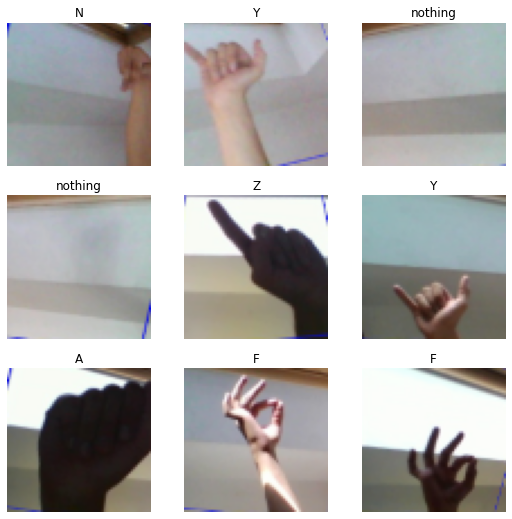

In [6]:
dls.show_batch()

## Model

In [7]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate, accuracy])

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.009120108559727669)

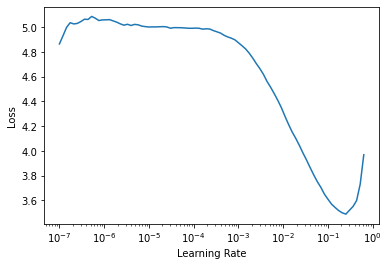

In [8]:
learn.lr_find()

In [9]:
learn.fine_tune(5, 2e-2, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.127704,1.137631,0.367126,0.632874,03:23
1,0.509049,0.434026,0.146897,0.853103,00:26
2,0.302287,0.213162,0.075632,0.924368,00:26


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.164225,0.115223,0.035920,0.964080,00:29
1,0.109338,0.081998,0.025402,0.974598,00:29
2,0.055924,0.032673,0.010977,0.989023,00:29
3,0.021443,0.004629,0.001322,0.998678,00:29
4,0.010693,0.001589,0.000287,0.999713,00:29


In [10]:
learn.save('r18')

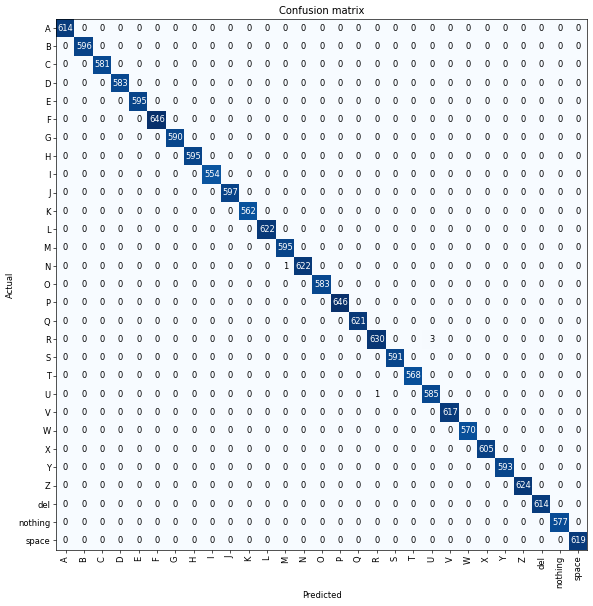

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(dpi=60, figsize=(10, 10))